In [109]:
import context
from IPython.display import Image
# import the quiz script
from numlabs.lab8 import quiz8 as quiz

In [110]:
%matplotlib inline
from numlabs.lab8 import qg
from numlabs.lab8 import qg1
from numlabs.lab8 import qg2
import matplotlib.pyplot as plt
import numpy as np
import cmocean

psis = qg.qg(86400.0*200, loop=False)
E=[]
for i in range(0,200,5):
    psi = qg.qg(86400.0*i, loop=False)
    E.append(100*(np.sum((psis-psi)))/np.sum(psis))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 15, 16]),)


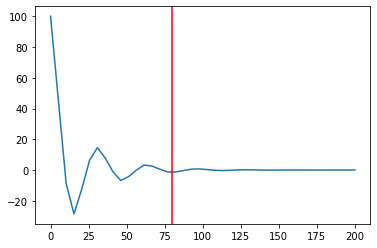

In [111]:
x=np.linspace(0,200,40)
plt.plot(x,E)
plt.axvline(x=16*5,c='r')

a=np.where(np.abs(E)>1)
print(a)

a) With the default set-up, how long in totaltime does it take to reach steady state?  Note that you will need to define an "operational" definition of steady state: say < n% of the solution maximum/solution mean.

-It would take about 80 days to reach steady state. I have defined the steady state as the time at which our solution will not differ more than a 1% from the final solution.

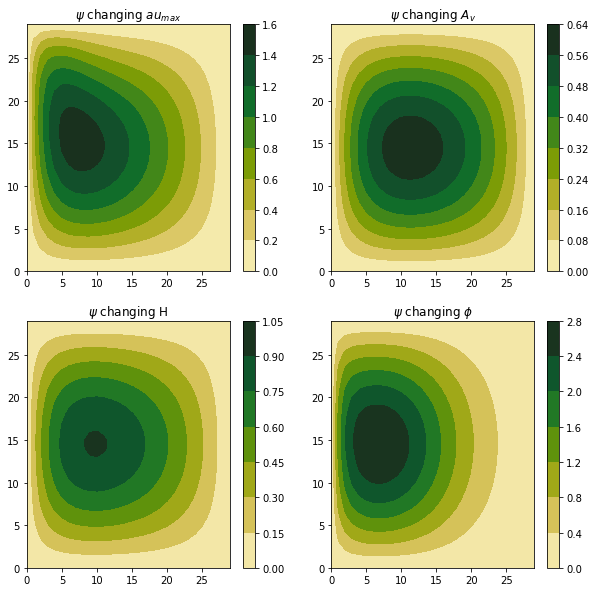

In [112]:
cmap=cmocean.cm.speed
T =86400.0*80
H=500
b=2.06e6 
Av=5.e-2
tau_max=0.2
latitude=45.
fig=plt.subplots(2,2,figsize=(10,10))

psi1 = qg1.qg(T,tau_max=2)
plt.subplot(221)
plt.title('$\psi$ changing $\tau_{max}$')
plt.contourf(psi1.T,cmap=cmap)
plt.colorbar()

psi2 = qg1.qg(T,Av=5.e-1)
plt.subplot(222)
plt.title('$\psi$ changing $A_v$')
plt.contourf(psi2.T,cmap=cmap)
plt.colorbar()

psi3 = qg1.qg(T,H=250)
plt.subplot(223)
plt.title('$\psi$ changing H')
plt.contourf(psi3.T,cmap=cmap)
plt.colorbar()

psi4 = qg1.qg(T,latitude=20.)
plt.subplot(224)
plt.title('$\psi$ changing $\phi$')
plt.contourf(psi4.T,cmap=cmap)
plt.colorbar()

b) Choose one parameter of the problem (eg depth, width of ocean, vertical viscosity, wind stress, latitude) vary it (3 or 4 choices) and compare the solutions. 

-I have modified: wind stress in the upper left subplot making it 10 times larger; vertical viscosity in the upper right subplot, also 10 times larger; depth in the lower left, halving it; and latitude in the lower right ,now 20°.

1- The increase in windstress results in a skewing of the streamfunction.

2- The increase in vertical viscosity results in a reduction of the maximum velocity and also weakens the strength of the western boundary current, slighly centering the streamfunction.  This is due to an increase in friction.

3- Similarly to the increase in vertical viscosity, the decrease in depth results in a reduction of the maximum velocity and a weakening of the strength of the western boundary current, slighly centering the streamfunction.  This is also due to an increase in friction.

4- A shift in the latitude towards the equator strengthens the western boundary current, this is because the change in f is larger for lower latitudes.

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs


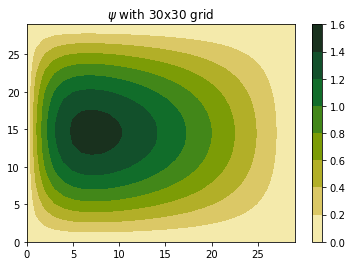

In [115]:
import importlib
importlib.reload(qg2)
%time
 
psi1 = qg.qg(T*2)
plt.contourf(psi1.T,cmap=cmap)
plt.title('$\psi$ with 30x30 grid')
plt.colorbar()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs


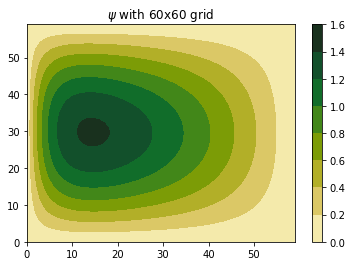

In [116]:
%time
psi2 = qg2.qg(T*2)
plt.contourf(psi2.T,cmap=cmap)
plt.title('$\psi$ with 60x60 grid')
plt.colorbar()

c) Increase the resolution from 30x30 to 60x60.  Make sure that your solution is converging to something similar to the 30x30 solution by adjusting one or more of the time step, the tol and the maxiter.  Once you have it working, use %time or another timing method to answer: by what factor does the time taken to get the solution change?

-I have adjusted only the tolerance reducing it 4 times and leaving all the other parameters the same. To make sure the new system reached steady state I runned both of the simulation 2 times the estimated time in part a). In my case, the computation took 50% more time for the higher resolution run.